# Preprocessing

**Notebook beinhaltet**:
preprocessing des Datensatzes:
1. [entferne Satzzeichen, "chorus", nur Kleinbuchstaben](#one)
2. [füge Spalte mit Songlänge/ Anzahl der Token hinzu](#two)
3. [erstelle ein Sample aus 25% des Originaldatensatzes](#three)
4. [Stemming der Songtexte](#four)

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
songs = pd.read_csv("../../songs_plus_dates.csv")
songs

,Unnamed: 0,song,date,artist,link,text,Genre1,Genre2,genre1,genre2
0,0,"Andante, Andante",1980,ABBA,/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl...",Pop,Rock,europop,swedish pop
1,2,As Good As New,1979,ABBA,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...,Pop,Rock,europop,swedish pop
2,4,Bang-A-Boomerang,1975,ABBA,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,Pop,Rock,europop,swedish pop
3,7,Cassandra,1981,ABBA,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...,Pop,Rock,europop,swedish pop
4,8,Chiquitita,1979,ABBA,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc...",Pop,Rock,europop,swedish pop
...,...,...,...,...,...,...,...,...,...,...
33617,84958,As I Said Before,1983,Zebra,/z/zebra/as+i+said+before_10198473.html,And I said before \nI don't want no more \nA...,Rock,Electronic,album rock,glam metal
33618,84960,Bears,1984,Zebra,/z/zebra/bears_20456403.html,In the middle of winter \nThe trees are bare ...,Rock,Electronic,album rock,glam metal
33619,84961,Hard Living Without You,1986,Zebra,/z/zebra/hard+living+without+you_10198468.html,Nothing to say no place to hide \nI can't fin...,Rock,Electronic,album rock,glam metal
33620,84965,When You Get There,1983,Zebra,/z/zebra/when+you+get+there_10198475.html,You wake up in the morning \nAnd you're not f...,Rock,Electronic,album rock,glam metal


## add number of types and tokens <a name="two"></a>

In [3]:
for i,row in songs.iterrows():
    c = Counter(row.text.split())
    songs.at[i, 'number_of_tokens'] = sum(c.values())
    songs.at[i, 'number_of_types'] = int(len(c))

In [4]:
songs.drop('Unnamed: 0', axis=1, inplace=True)
songs

,song,date,artist,link,text,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types
0,"Andante, Andante",1980,ABBA,/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl...",Pop,Rock,europop,swedish pop,260.0,87.0
1,As Good As New,1979,ABBA,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...,Pop,Rock,europop,swedish pop,312.0,120.0
2,Bang-A-Boomerang,1975,ABBA,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,Pop,Rock,europop,swedish pop,198.0,101.0
3,Cassandra,1981,ABBA,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...,Pop,Rock,europop,swedish pop,361.0,157.0
4,Chiquitita,1979,ABBA,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc...",Pop,Rock,europop,swedish pop,304.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...
33617,As I Said Before,1983,Zebra,/z/zebra/as+i+said+before_10198473.html,And I said before \nI don't want no more \nA...,Rock,Electronic,album rock,glam metal,228.0,79.0
33618,Bears,1984,Zebra,/z/zebra/bears_20456403.html,In the middle of winter \nThe trees are bare ...,Rock,Electronic,album rock,glam metal,204.0,97.0
33619,Hard Living Without You,1986,Zebra,/z/zebra/hard+living+without+you_10198468.html,Nothing to say no place to hide \nI can't fin...,Rock,Electronic,album rock,glam metal,165.0,66.0
33620,When You Get There,1983,Zebra,/z/zebra/when+you+get+there_10198475.html,You wake up in the morning \nAnd you're not f...,Rock,Electronic,album rock,glam metal,171.0,104.0


## Daten bereinigen <a name="one"></a>

In [5]:
for i, row in songs.iterrows():
    songs.at[i, 'text'] = row.text.replace(',',' ').replace('(',' ').replace(')',' ').replace('\n', '').replace("[Chorus]", "").lower()
songs

,song,date,artist,link,text,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types
0,"Andante, Andante",1980,ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,Pop,Rock,europop,swedish pop,260.0,87.0
1,As Good As New,1979,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,Pop,Rock,europop,swedish pop,312.0,120.0
2,Bang-A-Boomerang,1975,ABBA,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,Pop,Rock,europop,swedish pop,198.0,101.0
3,Cassandra,1981,ABBA,/a/abba/cassandra_20002811.html,down in the street they're all singing and sho...,Pop,Rock,europop,swedish pop,361.0,157.0
4,Chiquitita,1979,ABBA,/a/abba/chiquitita_20002978.html,chiquitita tell me what's wrong you're encha...,Pop,Rock,europop,swedish pop,304.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...
33617,As I Said Before,1983,Zebra,/z/zebra/as+i+said+before_10198473.html,and i said before i don't want no more and i...,Rock,Electronic,album rock,glam metal,228.0,79.0
33618,Bears,1984,Zebra,/z/zebra/bears_20456403.html,in the middle of winter the trees are bare an...,Rock,Electronic,album rock,glam metal,204.0,97.0
33619,Hard Living Without You,1986,Zebra,/z/zebra/hard+living+without+you_10198468.html,nothing to say no place to hide i can't find ...,Rock,Electronic,album rock,glam metal,165.0,66.0
33620,When You Get There,1983,Zebra,/z/zebra/when+you+get+there_10198475.html,you wake up in the morning and you're not fee...,Rock,Electronic,album rock,glam metal,171.0,104.0


In [34]:
songs.to_csv("../../songs_plus_dates.csv")

remove artists with less than 60 songs

In [4]:
c = Counter(songs.artist)

In [5]:
for v, k in c.items():
    if k<60:
        songs = songs[songs.artist!=v]

In [13]:
songs.to_csv("songs_plus_dates.csv")

## Erstellen eines Samplings <a name="three"></a>

In [15]:
songs_sample = songs.copy()
songs_sample = songs_sample.sample(frac=.25, replace=False, random_state=42)
songs_sample

,artist,song,text,number_of_tokens
20468,Van Halen,Take Your Whiskey Home,"[well, my, baby, she, don't, want, me, around....",224
41605,Lil Wayne,Army Gunz,"[yeah, yeah, yeah, (i, got, army, gunz), yeah,...",578
52292,Stevie Wonder,Isn't She Lovely,"[isn't, she, lovely, isn't, she, wonderful, is...",108
42697,Mariah Carey,O Holy Night,"[o, holy, night, the, stars, are, brightly, sh...",78
27993,Clash,I'm So Bored With The U.S.A.,"[yankee, soldier, he, want, to, shoot, some, s...",113
...,...,...,...,...
25325,Billie Holiday,My Last Affair,"[can't, you, see, what, love, and, romance, ha...",97
28783,Dave Matthews Band,The Space Between,"[you, cannot, quit, me, so, quickly, is, no, h...",310
18645,Squeeze,Crying In My Sleep,"[breaking, up, is, breaking, my, heart, is, sh...",178
32684,Foo Fighters,Dear Lover,"[dear, lover, do, you, remember?, the, sound, ...",134


In [16]:
songs_sample.to_csv("sample_25percent.csv")

## Stemming  <a name="four"></a>

In [14]:
songs = pd.read_csv("songs_plus_dates.csv")
songs.head(2)

,Unnamed: 0,song,date,artist,link,text,Genre1,Genre2,number_of_tokens
0,0,"Andante, Andante",1980,ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,Pop,Rock,1381
1,1,As Good As New,1979,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,Pop,Rock,1438


In [6]:
import spacy
import en_core_web_sm
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

sentence = songs.text[0]

ps = PorterStemmer()

for i, row in songs.iterrows():
    words = word_tokenize(row.text)
    sent = ""
    for word in words:
        sent = sent + " " + ps.stem(word)
    songs.at[i,"stemmed_text"] = sent
songs

,song,date,artist,link,text,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,stemmed_text
0,"Andante, Andante",1980,ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,Pop,Rock,europop,swedish pop,260.0,87.0,take it easi with me pleas touch me gentli li...
1,As Good As New,1979,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,Pop,Rock,europop,swedish pop,312.0,120.0,i 'll never know whi i had to go whi i had to...
2,Bang-A-Boomerang,1975,ABBA,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,Pop,Rock,europop,swedish pop,198.0,101.0,make somebodi happi is a question of give and...
3,Cassandra,1981,ABBA,/a/abba/cassandra_20002811.html,down in the street they're all singing and sho...,Pop,Rock,europop,swedish pop,361.0,157.0,down in the street they 're all sing and shou...
4,Chiquitita,1979,ABBA,/a/abba/chiquitita_20002978.html,chiquitita tell me what's wrong you're encha...,Pop,Rock,europop,swedish pop,304.0,119.0,chiquitita tell me what 's wrong you 're ench...
...,...,...,...,...,...,...,...,...,...,...,...,...
33617,As I Said Before,1983,Zebra,/z/zebra/as+i+said+before_10198473.html,and i said before i don't want no more and i...,Rock,Electronic,album rock,glam metal,228.0,79.0,and i said befor i do n't want no more and i ...
33618,Bears,1984,Zebra,/z/zebra/bears_20456403.html,in the middle of winter the trees are bare an...,Rock,Electronic,album rock,glam metal,204.0,97.0,in the middl of winter the tree are bare and ...
33619,Hard Living Without You,1986,Zebra,/z/zebra/hard+living+without+you_10198468.html,nothing to say no place to hide i can't find ...,Rock,Electronic,album rock,glam metal,165.0,66.0,noth to say no place to hide i ca n't find a ...
33620,When You Get There,1983,Zebra,/z/zebra/when+you+get+there_10198475.html,you wake up in the morning and you're not fee...,Rock,Electronic,album rock,glam metal,171.0,104.0,you wake up in the morn and you 're not feel ...


In [9]:
for i, row in songs.iterrows():
    songs.at[i, 'text'] = row.text.replace('[chorus:]','').lower()
songs

,song,date,artist,link,text,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,stemmed_text
0,"Andante, Andante",1980,ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,Pop,Rock,europop,swedish pop,260.0,87.0,take it easi with me pleas touch me gentli li...
1,As Good As New,1979,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,Pop,Rock,europop,swedish pop,312.0,120.0,i 'll never know whi i had to go whi i had to...
2,Bang-A-Boomerang,1975,ABBA,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,Pop,Rock,europop,swedish pop,198.0,101.0,make somebodi happi is a question of give and...
3,Cassandra,1981,ABBA,/a/abba/cassandra_20002811.html,down in the street they're all singing and sho...,Pop,Rock,europop,swedish pop,361.0,157.0,down in the street they 're all sing and shou...
4,Chiquitita,1979,ABBA,/a/abba/chiquitita_20002978.html,chiquitita tell me what's wrong you're encha...,Pop,Rock,europop,swedish pop,304.0,119.0,chiquitita tell me what 's wrong you 're ench...
...,...,...,...,...,...,...,...,...,...,...,...,...
33617,As I Said Before,1983,Zebra,/z/zebra/as+i+said+before_10198473.html,and i said before i don't want no more and i...,Rock,Electronic,album rock,glam metal,228.0,79.0,and i said befor i do n't want no more and i ...
33618,Bears,1984,Zebra,/z/zebra/bears_20456403.html,in the middle of winter the trees are bare an...,Rock,Electronic,album rock,glam metal,204.0,97.0,in the middl of winter the tree are bare and ...
33619,Hard Living Without You,1986,Zebra,/z/zebra/hard+living+without+you_10198468.html,nothing to say no place to hide i can't find ...,Rock,Electronic,album rock,glam metal,165.0,66.0,noth to say no place to hide i ca n't find a ...
33620,When You Get There,1983,Zebra,/z/zebra/when+you+get+there_10198475.html,you wake up in the morning and you're not fee...,Rock,Electronic,album rock,glam metal,171.0,104.0,you wake up in the morn and you 're not feel ...


In [17]:
songs['decades'] = '0'
songs.head(2)

,song,date,artist,link,text,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,stemmed_text,decades
0,"Andante, Andante",1980,ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,Pop,Rock,europop,swedish pop,260.0,87.0,take it easi with me pleas touch me gentli li...,0
1,As Good As New,1979,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,Pop,Rock,europop,swedish pop,312.0,120.0,i 'll never know whi i had to go whi i had to...,0


In [18]:
s = songs.copy()
for i, row in s.iterrows():
    if row.date >=1930 and row.date < 1940:
        s.at[i, 'decades'] = '1930s'
    if row.date >=1940 and row.date < 1950:
        s.at[i, 'decades'] = '1940s'
    if row.date >=1950 and row.date < 1960:
        s.at[i, 'decades'] = '1950s'
    if row.date >=1960 and row.date < 1970:
        s.at[i, 'decades'] = '1960s'
    if row.date >=1970 and row.date < 1980:
        s.at[i, 'decades'] = '1970s'
    if row.date >=1980 and row.date < 1990:
        s.at[i, 'decades'] = '1980s'
    if row.date >=1990 and row.date < 2000:
        s.at[i, 'decades'] = '1990s'
    if row.date >=2000 and row.date < 2010:
        s.at[i, 'decades'] = '2000s'
    if row.date >=2010 and row.date < 2020:
        s.at[i, 'decades'] = '2010s'
    if row.date >=2020:
        s.at[i, 'decades'] = '2020s'

In [19]:
s

,song,date,artist,link,text,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,stemmed_text,decades
0,"Andante, Andante",1980,ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,Pop,Rock,europop,swedish pop,260.0,87.0,take it easi with me pleas touch me gentli li...,1980s
1,As Good As New,1979,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,Pop,Rock,europop,swedish pop,312.0,120.0,i 'll never know whi i had to go whi i had to...,1970s
2,Bang-A-Boomerang,1975,ABBA,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,Pop,Rock,europop,swedish pop,198.0,101.0,make somebodi happi is a question of give and...,1970s
3,Cassandra,1981,ABBA,/a/abba/cassandra_20002811.html,down in the street they're all singing and sho...,Pop,Rock,europop,swedish pop,361.0,157.0,down in the street they 're all sing and shou...,1980s
4,Chiquitita,1979,ABBA,/a/abba/chiquitita_20002978.html,chiquitita tell me what's wrong you're encha...,Pop,Rock,europop,swedish pop,304.0,119.0,chiquitita tell me what 's wrong you 're ench...,1970s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,As I Said Before,1983,Zebra,/z/zebra/as+i+said+before_10198473.html,and i said before i don't want no more and i...,Rock,Electronic,album rock,glam metal,228.0,79.0,and i said befor i do n't want no more and i ...,1980s
33618,Bears,1984,Zebra,/z/zebra/bears_20456403.html,in the middle of winter the trees are bare an...,Rock,Electronic,album rock,glam metal,204.0,97.0,in the middl of winter the tree are bare and ...,1980s
33619,Hard Living Without You,1986,Zebra,/z/zebra/hard+living+without+you_10198468.html,nothing to say no place to hide i can't find ...,Rock,Electronic,album rock,glam metal,165.0,66.0,noth to say no place to hide i ca n't find a ...,1980s
33620,When You Get There,1983,Zebra,/z/zebra/when+you+get+there_10198475.html,you wake up in the morning and you're not fee...,Rock,Electronic,album rock,glam metal,171.0,104.0,you wake up in the morn and you 're not feel ...,1980s


In [20]:
s.to_csv("../../songs_plus_dates.csv")

In [107]:
counts = Counter(s.decades)
count = sorted(counts.items())
summe = (sum(counts.values()))

labels = []
values = []

for c in count:
    labels.append(c[0])
    values.append(float(c[1])/summe)
    
print(labels, values)

['1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'] [0.0015955488278852842, 0.0012273452522194492, 0.0101051425766068, 0.05445321769013624, 0.14110379249682936, 0.1660598126252915, 0.23397291658143435, 0.23176369512743936, 0.15329542200220922, 0.006423106819948452]


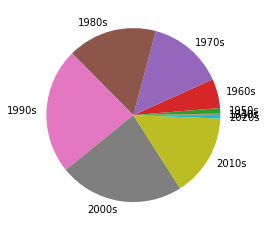

In [116]:
plt.pie(values, labels=labels, autopct=None)
plt.tight_layout()
plt.savefig("../../images/decades_pie")

In [123]:
counts = Counter(s.Genre1)
count = sorted(counts.items())
summe = (sum(counts.values()))

labels = []
values = []

for c in count:
    labels.append(c[0])
    values.append(float(c[1])/summe)
    
print(labels, values)

['Classical', 'Electronic', 'Folk, World, & Country', 'Funk / Soul', 'Hip Hop', 'Jazz', 'Latin', 'Pop', 'Reggae', 'Rock', 'Stage & Screen'] [0.0006136726261097246, 0.04823466841222436, 0.09106901771468313, 0.02745162214130835, 0.02646974593953279, 0.031256392423188645, 0.0013500797774413944, 0.14331301395082438, 0.0074868060385386405, 0.6215685472323365, 0.0011864337438121343]


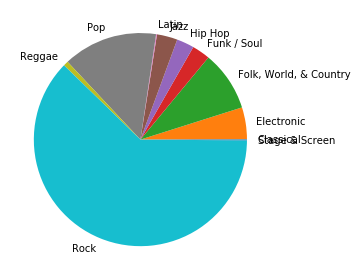

In [126]:
plt.pie(values, labels=labels, autopct=None)
plt.tight_layout()
plt.savefig("../../images/genre_pie")

In [129]:
print(len(np.unique(s.artist)))
print(len(s))

541
24443


#### one text per band and year

In [3]:
songs = pd.read_csv('../../songs_longtexts.csv')
songs.head(1)

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
0,0,"Andante, Andante",ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,take it easi with me pleas touch me gentli li...,easy slow andante soft light andante strong st...,"['VB', 'PRP', 'JJ', 'IN', 'PRP', '_SP', 'UH', ...",Pop,Rock,europop,swedish pop,260.0,87.0,1980,1980s


In [23]:
s = songs.copy()
text = s.groupby(['artist', 'decades'])['text'].apply(lambda x: ' '.join(x.astype(str))).reset_index()
stemmed = s.groupby(['artist', 'decades'])['stemmed_text'].apply(lambda x: ' '.join(x.astype(str))).reset_index()
POS = s.groupby(['artist', 'decades'])['POS'].apply(lambda x: ' '.join(x.astype(str))).reset_index()

In [39]:
result = pd.merge(text, stemmed, on=['artist', 'decades'])
result = pd.merge(result, POS, on=['artist', 'decades'])
result = pd.merge(result, s[['artist','decades','Genre1', 'genre1']], on=['artist', 'decades'])
result.drop_duplicates(subset=['artist', 'decades'], keep='first', inplace=True)
result

,artist,decades,text,stemmed_text,POS,Genre1,genre1
0,"""Weird Al"" Yankovic",1980s,potato skins potato cakes hash browns and i...,potato skin potato cake hash brown and instan...,french plain enough greasy sour lumpy tough en...,Rock,antiviral pop
37,"""Weird Al"" Yankovic",1990s,as i walk through the valley where i harvest m...,as i walk through the valley where i harvest ...,plain perfect fancy amish amish hard amish ami...,Rock,antiviral pop
65,"""Weird Al"" Yankovic",2000s,jillian was her name she was sweeter than asp...,jillian wa her name she wa sweeter than aspar...,same gorgeous perfect close sweet young ripe p...,Rock,antiviral pop
76,"""Weird Al"" Yankovic",2010s,my mama told me when i was hatched act like a...,my mama told me when i wa hatch act like a su...,red hard sure swiss crazy little okay crazy ev...,Rock,antiviral pop
81,*NSYNC,1990s,here we go here we go one more time eve...,here we go here we go one more time everybodi...,fine fine free right fine right fine free time...,Electronic,boy band
...,...,...,...,...,...,...,...
13287,Ziggy Marley,2000s,everybody's worried about time but i just kee...,everybodi 's worri about time but i just keep...,worried worried same beautiful old same beauti...,Reggae,reggae
13292,Ziggy Marley,2010s,everyone is happy tonight but not because of ...,everyon is happi tonight but not becaus of th...,happy conscious happy conscious happy consciou...,Reggae,reggae
13295,Zucchero,1990s,you make me feel loved every time i feel the ...,you make me feel love everi time i feel the r...,loved loved easy dead good sweet loved late lo...,Pop,classic italian pop
13296,Zucchero,2000s,ci vuole qualche cosa qualche cosa di piu' c...,ci vuol qualch cosa qualch cosa di piu ' ci v...,funky sole non funky funky funky funky funky m...,Pop,classic italian pop


In [42]:
for i,row in result.iterrows():
    c = Counter(row.text.split())
    result.at[i, 'number_of_tokens'] = sum(c.values())
    result.at[i, 'number_of_types'] = int(len(c))

In [48]:
result.to_csv('../../songs_decades.csv')

In [50]:
long = result[result.number_of_tokens>1000]
long.to_csv('../../song_decades_long.csv')